# BIOS 7747 Lecture Notes

## 2023-08-30

- Intro to numpy, pandas & matplotlib
- Reading and writing python objects
  - `shelve`
  - `df.to_excel`
  - `pd.read_excel`


In [14]:
import numpy as np
import pandas as pd
import shelve
import matplotlib.pyplot as plt

### numpy: arrays

In [ ]:
# plain array object constructor
#a_obj =  np.ndarray(shape=)
a = np.array([1,2,3], dtype = np.float32)
a = np.zeros((5, 20), dtype  = np.float32)
a = np.full((5,20), 5, dtype = np.float32)

# helper attr for getting dimensions
print(f"size = {a.ndim}")
# attr for total number of elements
print(f"a.size= {a.size}")
print(f"dtype = {a.dtype}")






In [43]:
# a low level method for initializing arrays
ndarr = np.ndarray(shape = (5, 5), dtype = np.int8)
ndarr

array([[ -49,   48,   55,  -57,   21],
       [  86,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   0, -124, -124, -101,  110],
       [ 119, -105,   32,   64,    0]], dtype=int8)

In [44]:
# basic 1d array
arr = np.array([1,2,3], dtype = np.float32)
arr

array([1., 2., 3.], dtype=float32)

In [47]:
# 5 x 20 array filled with zeros
arr_zeros = np.zeros((5, 20), dtype  = np.float32)
arr_zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [49]:
# 5 x20 array filled with 5
arr_5 = np.full((5,20), 5, dtype = np.float32)
arr_5

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5.]], dtype=float32)

In [50]:
# get number of dimensions
arr_5.ndim

2

In [52]:
# get shape (tuple of length in each dimension)
arr_5.shape

(5, 20)

In [53]:
# get total num of elements
arr_5.size

100

In [55]:
# get data type of arr elements
arr_5.dtype

dtype('float32')

### numpy: np.random

In [85]:
# random normal dist
arr_normal = np.random.normal(loc = 0, scale = 1, size = (5,20))
print(arr_normal.shape, arr_normal.mean(), arr_normal.max())

(5, 20) -0.09263963159283368 2.424635399776611


In [86]:
# random uniform
arr_uniform_1 = np.random.random((5,20))
arr_uniform_2 = np.random.random((15,20))
print(arr_uniform_1.shape, arr_uniform_2.shape)

(5, 20) (15, 20)


### numpy: matrix multiplication

MxN * NxP = MxP

In [91]:
# matrix multiplication
arr_uniform_mult = arr_uniform_1 @ arr_uniform_2.T
print(arr_uniform_mult.shape, arr_uniform_mult.mean(), arr_uniform_mult.max())

(5, 15) 4.644011149333807 6.696483165009798


In [93]:
d = np.linalg.pinv(arr_uniform_mult)
print(d)

[[ 0.17287277  0.19143719  0.18408448 -0.40308956 -0.22642406]
 [ 0.23534298 -0.06589723 -0.2023889  -0.14509462  0.18335721]
 [-0.42841428 -0.0244924   0.43300585 -0.39531287  0.33848244]
 [ 0.10449012 -0.14834668 -0.28729817  0.27312406  0.14516673]
 [-0.04208225  0.19429205  0.15712618 -0.01964736 -0.29671466]
 [-0.25536117  0.38934445  0.2630418  -0.13106314 -0.30895121]
 [-0.16628362 -0.00954138 -0.21271772  0.19650865  0.25966334]
 [ 0.27953019 -0.10249494 -0.25225306 -0.03448978  0.13908109]
 [-0.1534104   0.20685236 -0.12921591  0.08651178  0.0186098 ]
 [ 0.19331622 -0.10263065 -0.11649478  0.03920739  0.01726478]
 [-0.10013328 -0.36619247 -0.01860385  0.37242907  0.21074742]
 [-0.18481231  0.4716228   0.26008639 -0.39420553 -0.24736468]
 [ 0.25972885 -0.41694272 -0.03564229  0.30927635 -0.03163312]
 [-0.03091023 -0.1051874   0.04138998 -0.0281424   0.13419693]
 [ 0.07299394 -0.180194   -0.09369833  0.41599825 -0.11494537]]


In [94]:
?np.linalg.pinv

Signature:       np.linalg.pinv(a, rcond=1e-15, hermitian=False)
Call signature:  np.linalg.pinv(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function pinv at 0x7fd3b1eb2820>
File:            ~/ghub/bios_7747/.venv/lib/python3.9/site-packages/numpy/linalg/linalg.py
Docstring:      
Compute the (Moore-Penrose) pseudo-inverse of a matrix.

Calculate the generalized inverse of a matrix using its
singular-value decomposition (SVD) and including all
*large* singular values.

.. versionchanged:: 1.14
   Can now operate on stacks of matrices

Parameters
----------
a : (..., M, N) array_like
    Matrix or stack of matrices to be pseudo-inverted.
rcond : (...) array_like of float
    Cutoff for small singular values.
    Singular values less than or equal to
    ``rcond * largest_singular_value`` are set to zero.
    Broadcasts against the stack of matrices.
hermitian : bool, optional
    If True, `a` is assumed to be Hermitian (symmetric if real-valued),
    ena

In [8]:
a = np.array([1,0,0,1,1,0,1,0,1,1,0,1], dtype = np.int8)
# get the indices of arrray that satisify a condition
positiveIndices = np.argwhere(a == 1).ravel() # use ravel to flatten matrix to vector
print(positiveIndices)

featureMatrix = np.random.normal(0, 1, size = (12, 75))
# index using a mask to get the postive samples
positiveFeatures = featureMatrix[positiveIndices, :]
print(positiveFeatures.shape)

[ 0  3  4  6  8  9 11]
(7, 75)


In [9]:
a = np.array([1,0,0,1,1,0,1,0,1,1,0,1], dtype = np.int8)
b = np.array([1,4,5,1,1,7,1,9,1,1,6,1], dtype = np.int8)

df = pd.DataFrame({'BMI': a, 'Height': b})
df
df.to_excel('data.xlsx', index = False)

df2 = pd.read_excel('data.xlsx')
print(df2)


    BMI  Height
0     1       1
1     0       4
2     0       5
3     1       1
4     1       1
5     0       7
6     1       1
7     0       9
8     1       1
9     1       1
10    0       6
11    1       1


In [10]:
# writing python objects with shelve

with shelve.open('database') as shelveFile:
    shelveFile['BMI'] = a
    shelveFile['Height'] = b
    

In [11]:
# reading python objects with shelve

with shelve.open('database', 'r') as shelveFile:
    a_new = shelveFile['BMI']
    b_new = shelveFile['Height']

print(a_new,b_new)

[1 0 0 1 1 0 1 0 1 1 0 1] [1 4 5 1 1 7 1 9 1 1 6 1]


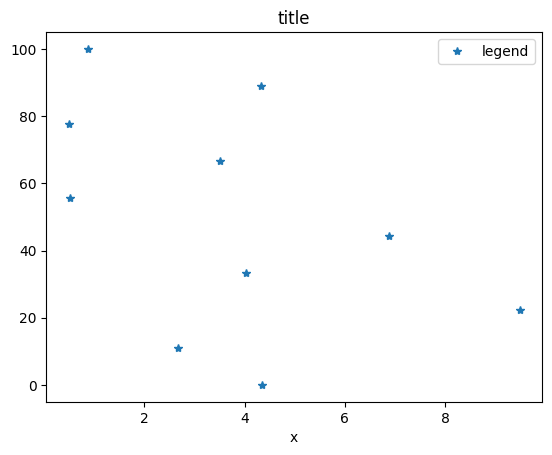

In [12]:
# matplotlib

a = np.array(np.random.uniform(0, 10, size = 10))
x = np.linspace(0, 100, a.size)

plt.plot(a, x, '*')
plt.title("title")
plt.xlabel('a')
plt.xlabel('x')
plt.legend(['legend'])
plt.show()

# 2023-09-06

AI algorithm heirarchy:

- narrow: solve specific problems
- general: solve variety of problems
- super: exceed human intelligence

Ethics in algorithm development:

- Features chosen can have indirect ethical consequences

example: using healthcare spending as a predictor for needing more resources; if healthcare spending is predominately applied to certain communities versus others, then this becomes a feed forward algorithm which will miss under-represented groups.

*Data bias*:

example: genomic datasets are predominately collected from NA (specifically 3 states of America)

*Impossibility theoerm*:

No statistical method can solve fairness in data and algorithm design

*Reporting bias*:

Only reporting data that supports hypothesis; excluding data that may disprove or unfavor the hypothesis

*Anchoring bias*:

Establishing a hypothesis and seeking data to support that hypothesis 

*Automation bias*:

The human choice can be influenced heavily be recommendation algorithms. Clinicians under pressure have to exert more energy to work against the algorithm

*Privlege bias*:
Access to algorithms is only available to a subset of people

*Bias*: who is left out in the data? 

Dissemination and implementation (D&I): use the method for the _right_ people, not just the most people

*Tools*

Influence the way we think and what we do

Example: hospitals that implement a survelliance system for monitoring whether doctor's wash their hands in between room visits; then, the hospitals could be designed to gather more data for this tool





## 2023_09_13

- LR: can use sklearn or stats.models
- Use Blat-Altman plot 

- For non-linear approach, use scipy




## 2023_09_18